### **`eigenvalue`와 `eigenvector` 산출 방법**

In [ ]:
# 필요한 Lib(Numpy) Import
import numpy as np

# 예시 array를 'a'로 지정
a = np.array([[4,2],[2,4]])

# eigenvalue, eigenvector 산출
eigenvalue, eigenvector = np.linalg.eig(a)
print("eigenvalue: ", eigenvalue)
print("eigenvector: ", eigenvector)

eigenvalue:  [6. 2.]
eigenvector:  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### **Penguins DataSet의 Numerical Feature 6개에 대해 PCA 시행**

<img src='https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png' width = 450>


**데이터셋 Load 링크**
- [Palmer-penguins](https://github.com/allisonhorst/palmerpenguins) 
<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>



In [ ]:
# 필요한 Lib Import
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 내장데이터에서 결측값 0으로 채운 뒤 데이터셋 Load (해당 모델링은 PCA 실습에 중점을 두었으므로, PCA 학습을 위한 최소한의 데이터 전처리만 진행합니다.)
penguins = sns.load_dataset('penguins').fillna(0)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,0.0,0.0,0.0,0.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# 라벨인코더를 활용해 인코딩을 수행합니다.

le = preprocessing.LabelEncoder()
le = le.fit(penguins['species'])
penguins['species'] = le.transform(penguins['species'])

le = le.fit(penguins['island'])
penguins['island'] = le.transform(penguins['island'])

In [ ]:
# 'sex' feature의 '0'은 이상치이므로, 삭제합니다. (해당 모델링은 PCA 실습에 중점을 두었으므로, PCA 학습을 위한 최소한의 데이터 전처리만 진행합니다.)

penguins['sex'] = penguins['sex'].str.replace('0','')
penguins.dropna(subset=['sex'],how='any',inplace=True,axis=0)

In [ ]:
# 전처리가 잘 진행되었는지 확인합니다.
penguins['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# 'sex' feature도 이상치 제거가 완료되었으므로, 라벨인코딩을 진행합니다.

le = le.fit(penguins['sex'])
penguins['sex'] = le.transform(penguins['sex'])

### **Scaling**

데이터를 모델링하기 전에는 반드시 스케일링 과정을 거쳐야 합니다. 스케일링을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킵니다.


1.	**StandardScaler**	기본 스케일. 평균과 표준편차 사용 - 즉, 데이터를 정규분포화. (각 특성의 평균을 0 분산을 1로 변경)
2.	**MinMaxScaler**	최대/최소값이 각각 1, 0이 되도록 스케일링
3.	**MaxAbsScaler**	최대/절댓값과 0이 각각 1, 0이 되도록 스케일링
4.	**RobustScaler**	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

&nbsp;

**이외 자세한 Scaler 설명은 GitHub Blog에 별도 포스팅하겠습니다.**



&nbsp;


*참고링크*

*https://wooono.tistory.com/96*

*https://mkjjo.github.io/python/2019/01/10/scaler.html*


In [ ]:
# Standard Scaling을 수행합니다.

scaled = StandardScaler().fit_transform(penguins.iloc[:, :-1])
scaled.shape

(333, 6)

In [ ]:
scaled

array([[-1.03437424,  1.88939197, -0.89604189,  0.7807321 , -1.42675157,
        -0.56847478],
       [-1.03437424,  1.88939197, -0.82278787,  0.11958397, -1.06947358,
        -0.50628618],
       [-1.03437424,  1.88939197, -0.67627982,  0.42472926, -0.42637319,
        -1.1903608 ],
       ...,
       [ 1.21691087, -0.91313599,  1.17338426, -0.74499437,  1.50292796,
         1.91906927],
       [ 1.21691087, -0.91313599,  0.22108196, -1.20271231,  0.78837197,
         1.23499466],
       [ 1.21691087, -0.91313599,  1.08181673, -0.54156417,  0.85982757,
         1.48374906]])

### **PCA**

한글로는 주성분분석으로 불리며, 차원축소 방법론 중 하나입니다.

주성분 분석은 고차원의 데이터를 저차원의 데이터로 환원시키는 기법을 말합니다. 이 때 서로 연관 가능성이 있는 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간의 표본으로 변환하기 위해 직교 변환을 사용합니다.

&nbsp;

**이외 자세한 Scaler 설명은 GitHub Blog에 별도 포스팅하겠습니다.**



In [ ]:
# Numerical Feature 6개에 대해 PCA(차원축소)를 수행합니다.

pca = PCA(n_components=6)

pca.fit(scaled)
pca_data = pca.transform(scaled)

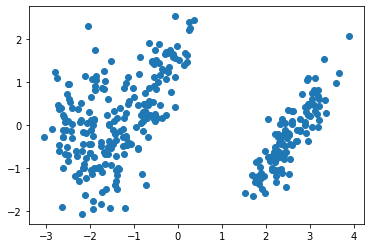

In [ ]:
# Scatter Plot을 활용해 PCA 결과를 확인합니다.

%matplotlib inline
plt.scatter(pca_data[:,0],pca_data[:,1])